In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Veri yolu
data_path = '../data/raw/Student_Depression_Dataset.csv'

# Dataset’i oku
df = pd.read_csv(data_path)

# İlk 5 satıra bak
df.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
# Veri tipi ve eksik veri kontrolü
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
# Eksik değerleri kontrol et
df.isnull().sum()


id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [6]:
# Financial Stress eksiklerini medyan ile dolduralım
median_financial_stress = df['Financial Stress'].median()
df['Financial Stress'].fillna(median_financial_stress, inplace=True)


C:\Users\efsa2\AppData\Local\Temp\ipykernel_24144\3823161617.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financial Stress'].fillna(median_financial_stress, inplace=True)


In [7]:
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"{col} sütunu sabit ve çıkarılabilir.")


In [8]:
# Sabit sütunları çıkar
df = df.drop(columns=['Work Pressure', 'Job Satisfaction','City'])

# Modelleme için id sütununu çıkar
df = df.drop(columns=['id'])

# Yeni dataframe özetine bak
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   Profession                             27901 non-null  object 
 3   Academic Pressure                      27901 non-null  float64
 4   CGPA                                   27901 non-null  float64
 5   Study Satisfaction                     27901 non-null  float64
 6   Sleep Duration                         27901 non-null  object 
 7   Dietary Habits                         27901 non-null  object 
 8   Degree                                 27901 non-null  object 
 9   Have you ever had suicidal thoughts ?  27901 non-null  object 
 10  Work/Study Hours                       27901 non-null  float64
 11  Fi

In [9]:
# Aykırı değer analizi 
from scipy.stats import zscore
z_scores = np.abs(zscore(df.select_dtypes(include=np.number)))
df = df[(z_scores < 3).all(axis=1)]

In [10]:
# Sayısal sütunların özet istatistikleri
df.describe()


,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27873.000000,27873.000000,27873.000000,27873.000000,27873.000000,27873.000000,27873.000000
mean,25.807520,3.141894,7.658714,2.944642,7.157679,3.139382,0.585728
std,4.871661,1.380733,1.464479,1.360416,3.707209,1.437408,0.492605
min,18.000000,0.000000,5.030000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,6.290000,2.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,8.920000,4.000000,10.000000,4.000000,1.000000
max,39.000000,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000


In [11]:
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


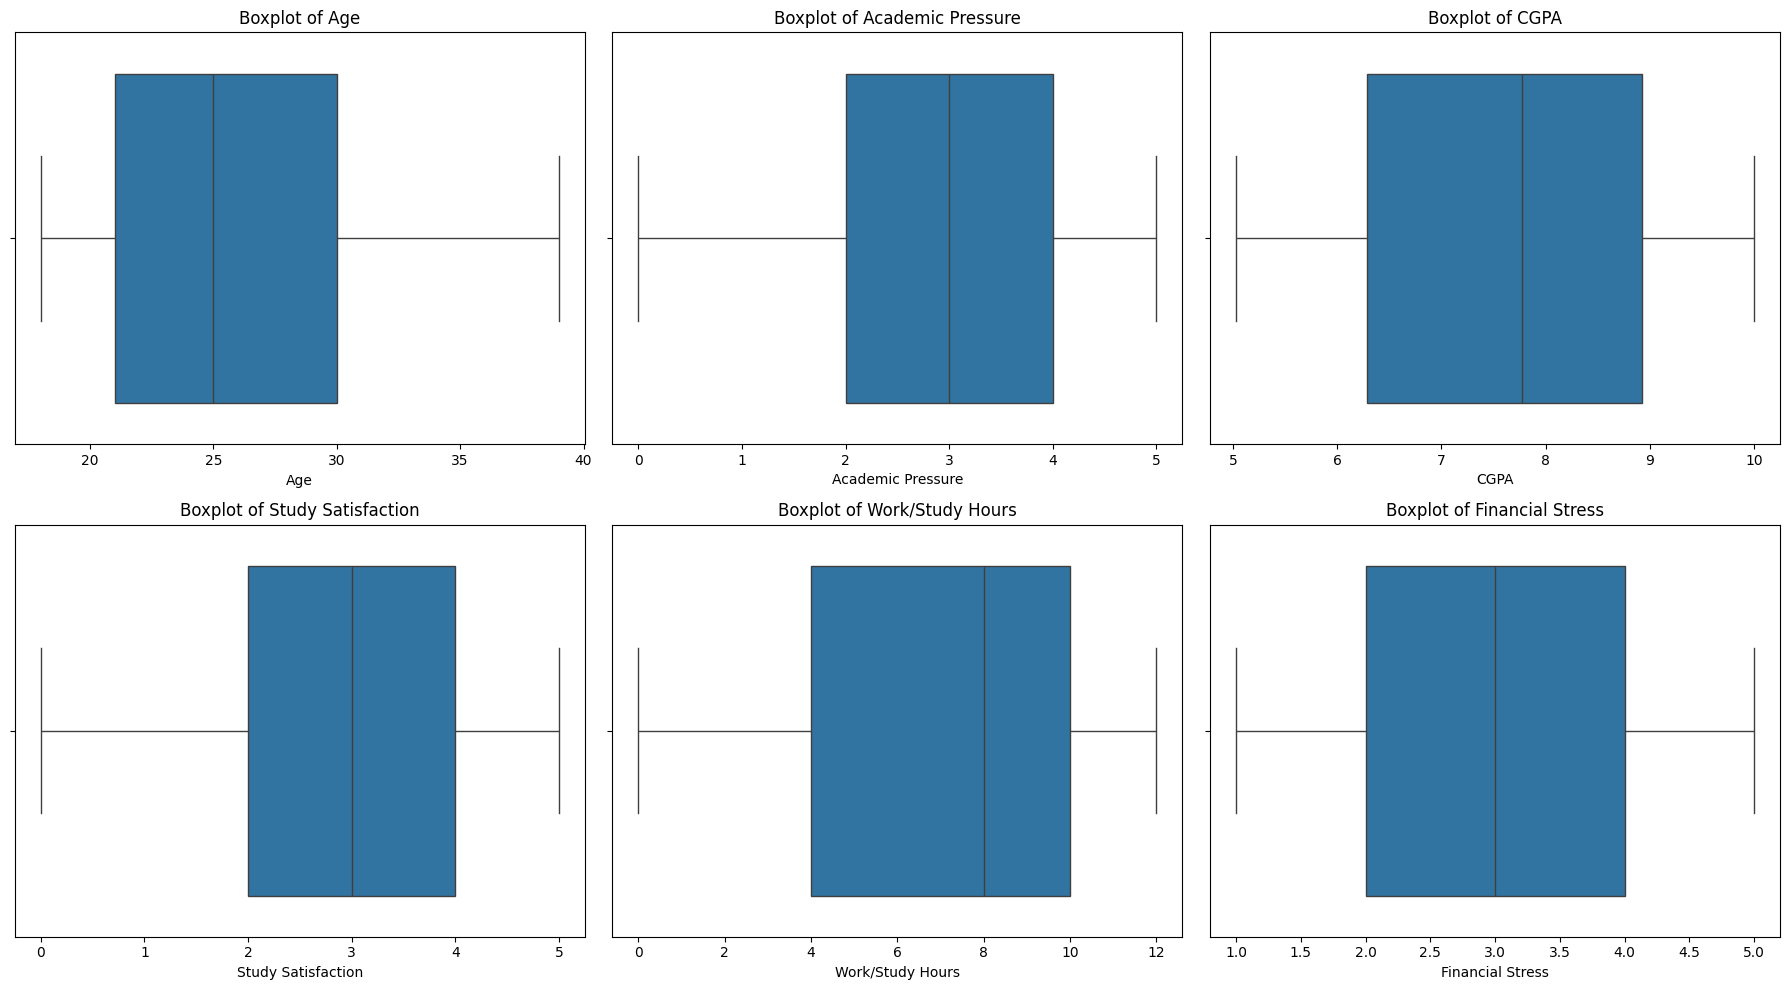

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sayısal sütunları seçelim
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# id ve target olan 'Depression' sütununu dışarda bırakıldı
if 'id' in numeric_cols:
    numeric_cols.remove('id')
if 'Depression' in numeric_cols:
    numeric_cols.remove('Depression')

# Plot sayısı
num_plots = len(numeric_cols)

# 3 sütunlu grid yapısı oluşturulacak
cols = 3
rows = (num_plots // cols) + (1 if num_plots % cols != 0 else 0)

plt.figure(figsize=(cols * 6, rows * 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


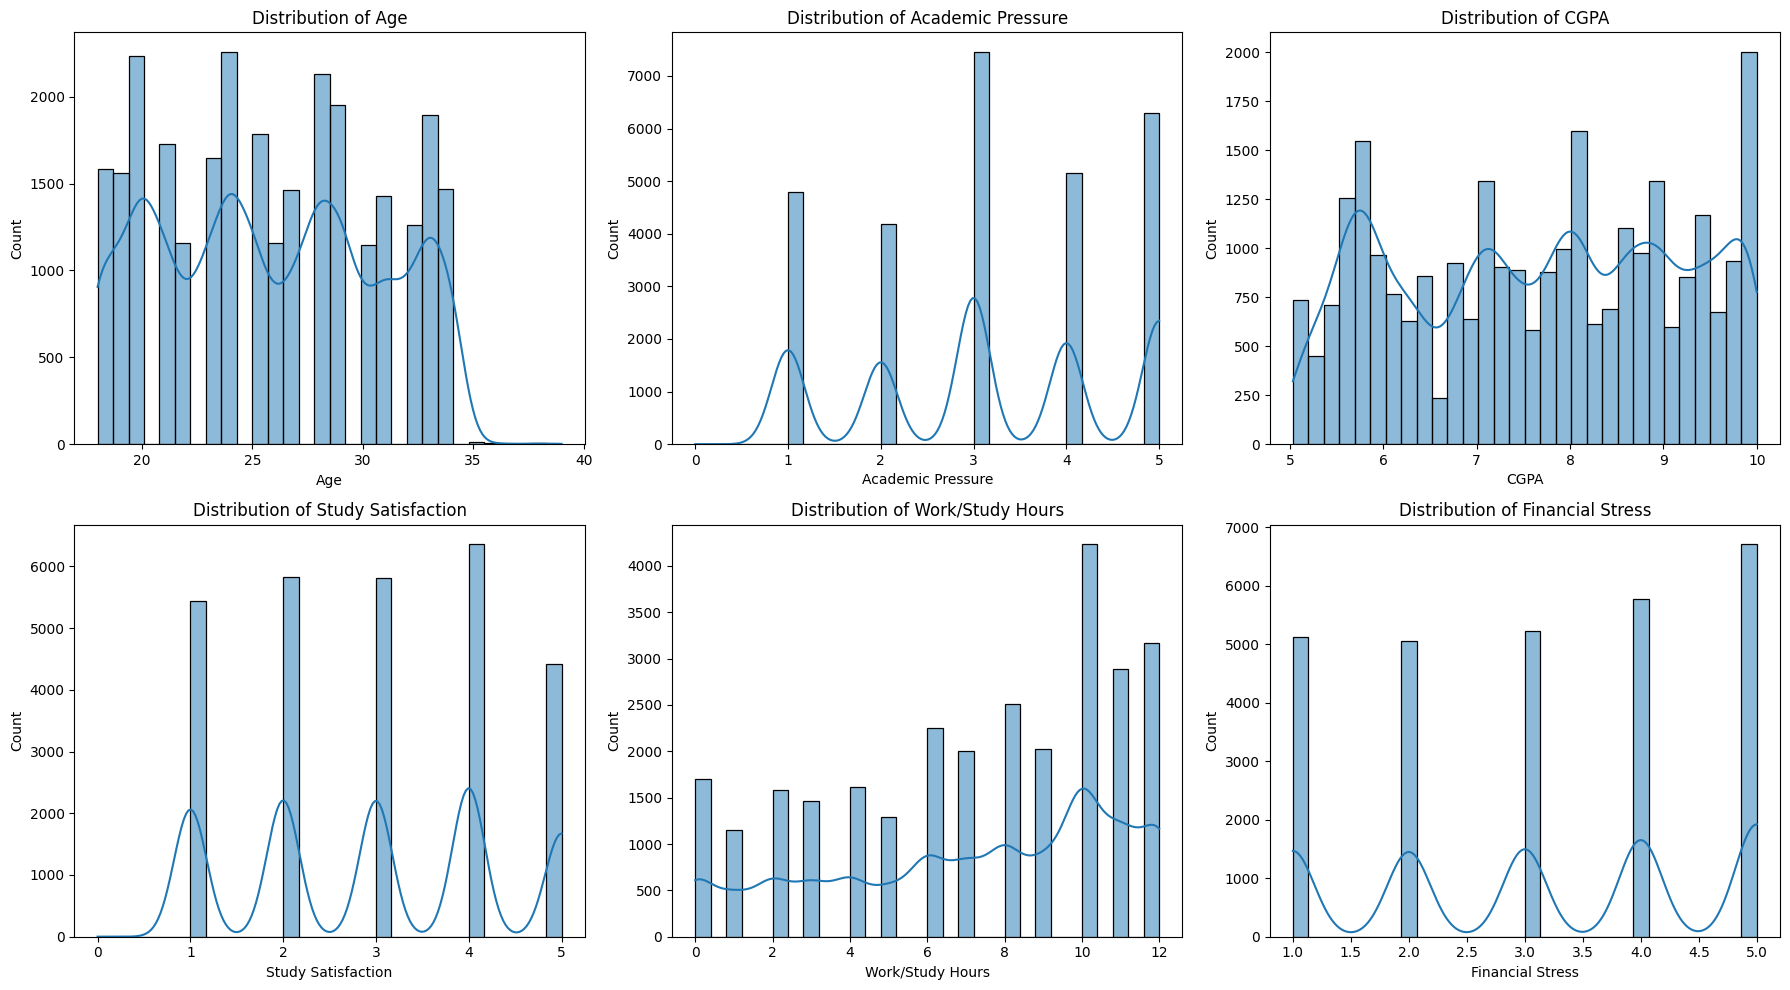

In [13]:
plt.figure(figsize=(cols * 6, rows * 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


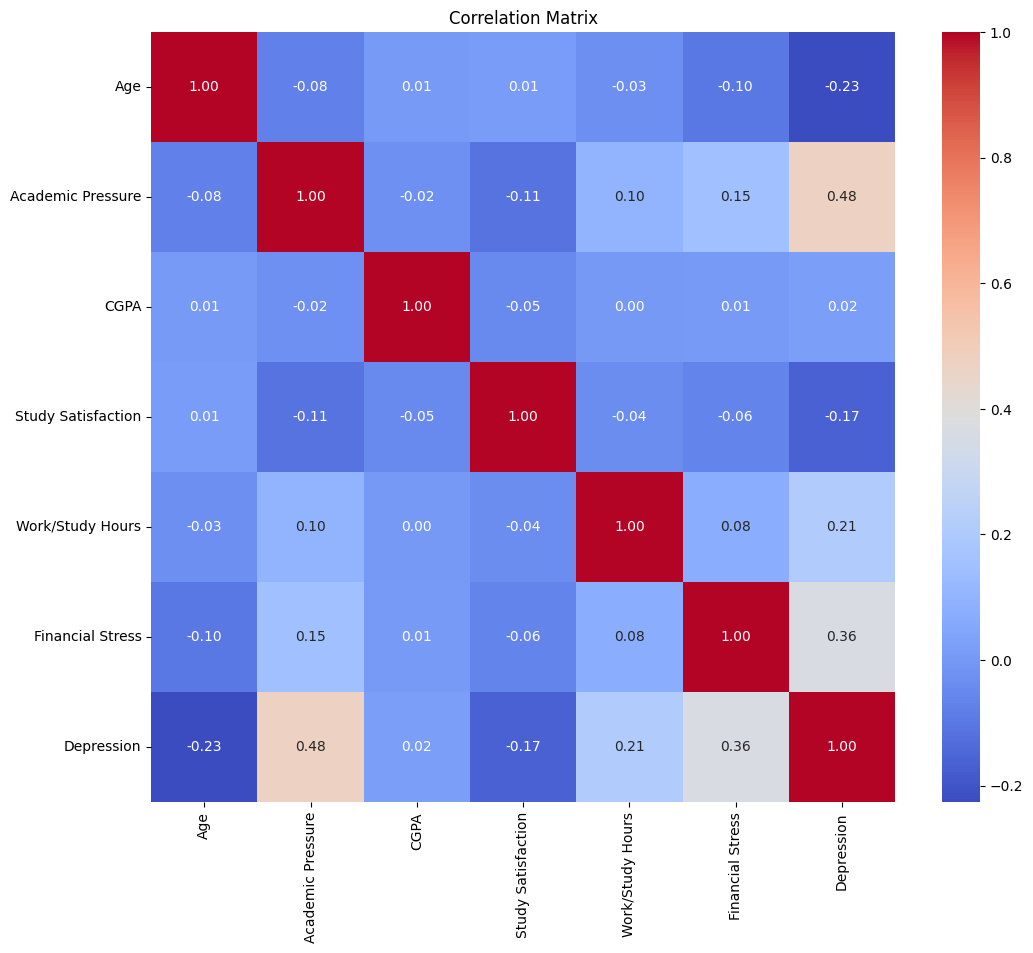

In [14]:
plt.figure(figsize=(12,10))
corr = df[numeric_cols + ['Depression']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


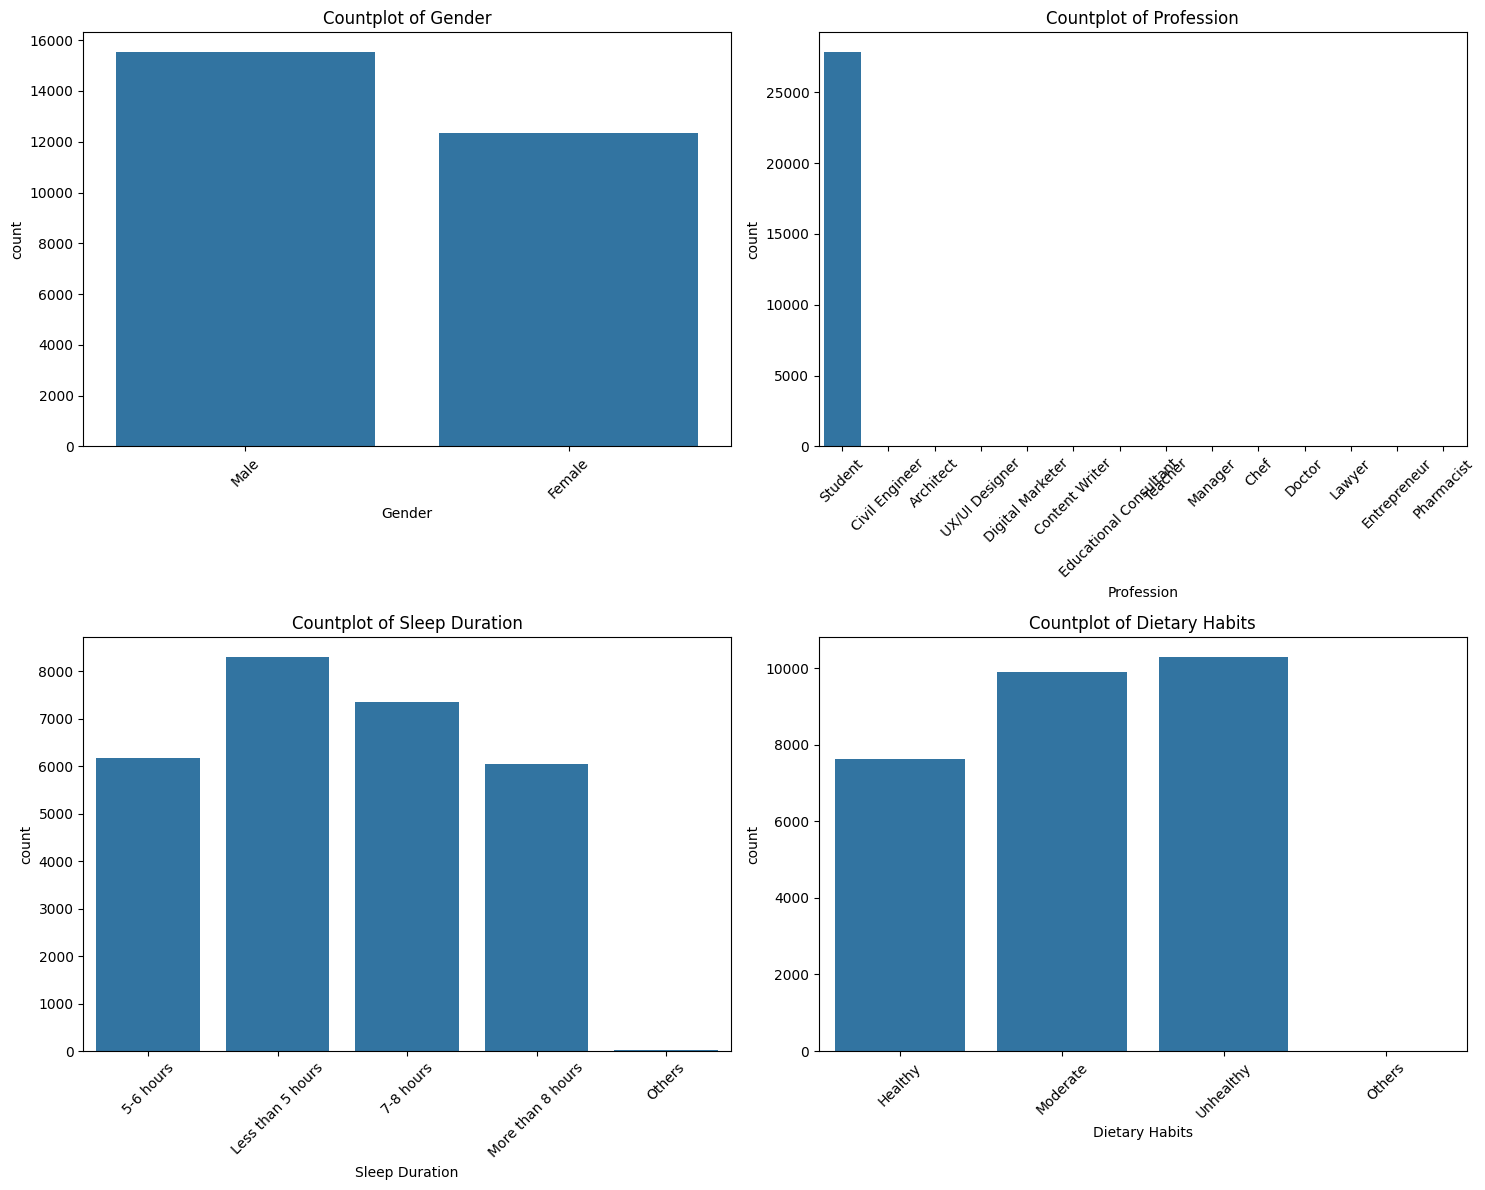

In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols[:4]):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
# Temizlenmiş veri setini kaydet
os.makedirs('data/processed', exist_ok=True)
df.to_csv('../data/processed/cleaned_dataset.csv', index=False)


In [17]:
df

,Gender,Age,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Student,5.0,5.75,5.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,Male,27.0,Student,2.0,9.40,3.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,Student,3.0,6.61,4.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,Student,5.0,6.88,2.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1
